# Decision Tree -Diabetes Dataset


Feature descripions below:
* xpregnant = number of times pregnant
* glucose = plusma glucose concentration a 2 hours in an oral glucose tolerance test
* diastolic = Diastolic blood pressure (mm Hg)
* tricep = Triceps skin fold thikness (mm)
* insulin = 2-Hour serum insulin (mu U/ml)
* bmi = Body mass index (weight in kg/(height in m)^2)
* pedigree = a function which scores likelihood of diabetes based on family history
* age = Age (years)
* diabetes = Target/Dependent variable : 1:tested positive for diabetes 0:tested negative for diabetes

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.head()

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age,diabetes
0,2,108,62,32,56,25.2,0.128,21,0
1,0,137,68,14,148,24.8,0.143,21,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,139,62,17,210,22.1,0.207,21,0
4,4,99,76,15,51,23.2,0.223,21,0


In [3]:
df.shape

(392, 9)

In [4]:
df.isnull().sum()

xpregnant    0
glucose      0
diastolic    0
tricep       0
insulin      0
bmi          0
pedigree     0
age          0
diabetes     0
dtype: int64

In [5]:
df.head()

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age,diabetes
0,2,108,62,32,56,25.2,0.128,21,0
1,0,137,68,14,148,24.8,0.143,21,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,139,62,17,210,22.1,0.207,21,0
4,4,99,76,15,51,23.2,0.223,21,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
xpregnant,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
diastolic,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
tricep,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
bmi,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
pedigree,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
diabetes,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


<Axes: xlabel='xpregnant', ylabel='Count'>

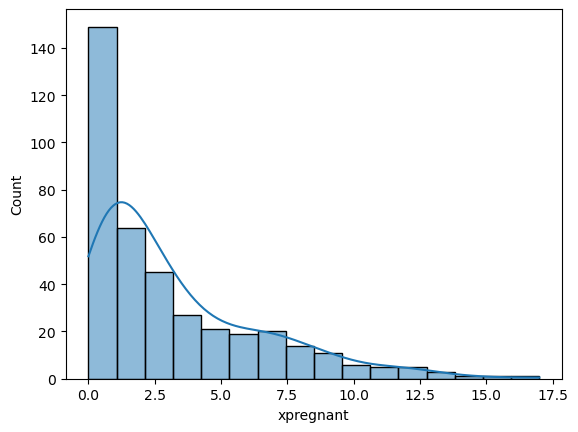

In [7]:
sns.histplot(df['xpregnant'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

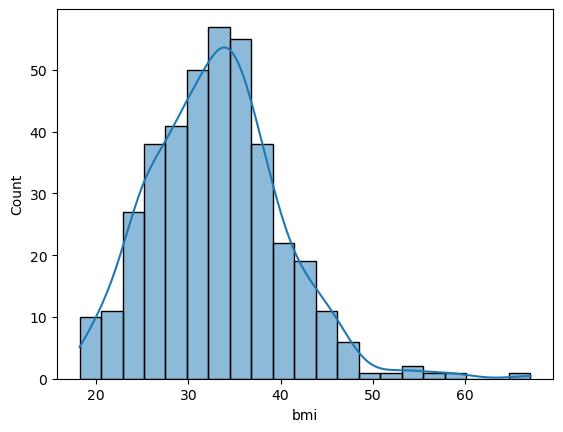

In [8]:
sns.histplot(df['bmi'], kde=True)

In [9]:

df['diabetes'].value_counts()

0    262
1    130
Name: diabetes, dtype: int64

In [10]:
df.columns

Index(['xpregnant', 'glucose', 'diastolic', 'tricep', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [11]:
temp = df[['xpregnant', 'glucose', 'diastolic', 'tricep', 'insulin', 'bmi','pedigree','age','diabetes']].copy()
temp.groupby(['diabetes']).mean() 

,xpregnant,glucose,diastolic,tricep,insulin,bmi,pedigree,age
diabetes,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [12]:
pd.crosstab(df['diabetes'], df['xpregnant'])

xpregnant,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
diabetes,,,,,,,,,,,,,,,,,
0,37,73,52,26,21,13,15,10,3,5,3,0,2,2,0,0,0
1,19,20,12,19,6,8,4,10,11,6,3,5,3,1,1,1,1


### Set up X and Y

In [13]:
Y = df['diabetes']
X = df[['glucose','bmi']]

## Decision Tree

In [14]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(max_depth=2, random_state = 0)
clf= clf.fit(X, Y)

[Text(0.5, 0.8333333333333334, 'glucose <= 127.5\ngini = 0.443\nsamples = 392\nvalue = [262, 130]'),
 Text(0.25, 0.5, 'bmi <= 45.4\ngini = 0.254\nsamples = 241\nvalue = [205, 36]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.232\nsamples = 232\nvalue = [201, 31]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.75, 0.5, 'glucose <= 165.5\ngini = 0.47\nsamples = 151\nvalue = [57, 94]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 105\nvalue = [52, 53]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.194\nsamples = 46\nvalue = [5, 41]')]

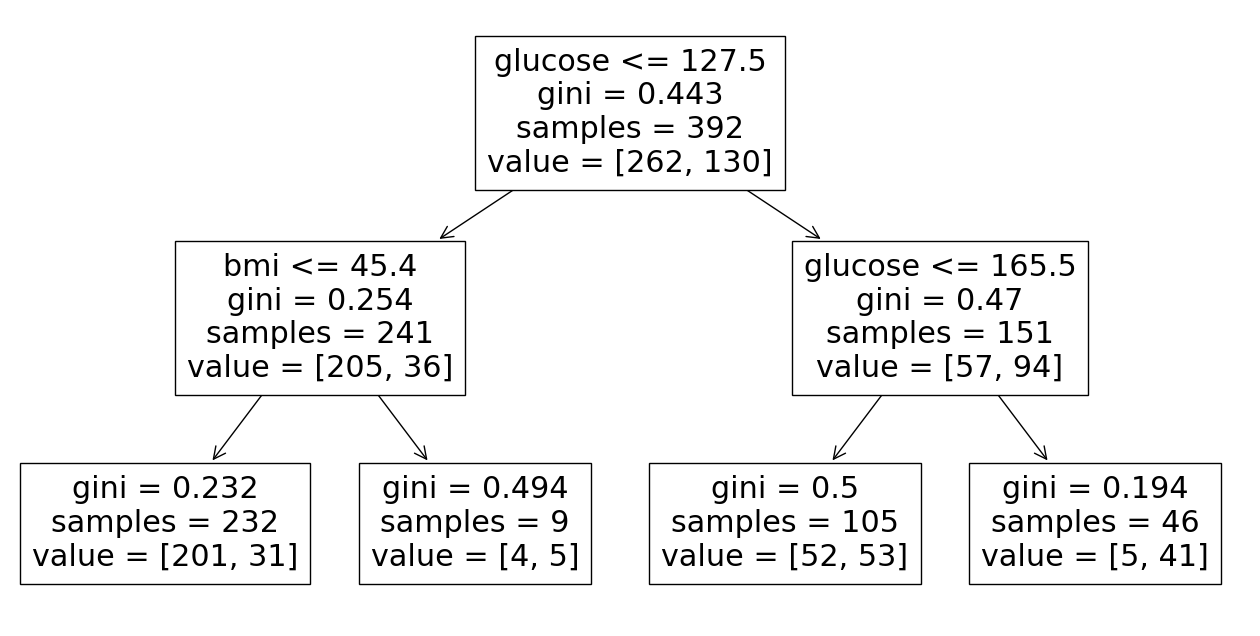

In [15]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf,feature_names=['glucose', 'bmi'])

Interpretation:
* Left path (for women who have a glucose level <= 127.5, 205/(205+36)=(85/1\%) do not have diabetes and 36/(205+36)= (14/9\%)  have diabetes
  * for women who have bmi<=45.5, 201/(201+31)=(86.6\%) do not have diabetes and 31/(201+31)=(13.4\%) have diabetes 
  * for women whose bmi>45.4, 4/(4+5)= (44.4\%) do not have diabetes and 5/(4+5)= (55.6\%) have diabetes
* Right path (for women who have a glucose level > 127.5, 57/(57+94)=(37.8\%) do not have diabetes and 94/(57+94)=(62.2\%) have diabetes
  * for women whose glucose is between 127.5 and 165.6, 52/(52+53)=(49.5\%) do not have diabetesand 53/(52+53)=(50.5\%) have diabetes
  * for women who glucose is higher than 165.5, 5/(5+41)=(10.9\%) do not have diabetes and 41/(5+41)=(89.1\%) have diabetes

So clearly there is a relationship between glucose (which is a type of sugar) and diabetes.  Of course, diabetes _is_ actually the inability of the body to process sugar (i.e., low insulin levels), so this shouldn't be too surprising.  


## Feature importance

Between the two features--glucose and bmi--which is more probative?  That is, which one is more important in predicting whether or not someone has diabetes?

In [16]:
clf.feature_importances_

array([0.94309155, 0.05690845])

The above indicates that glucose is 94.3% important, while bmi is only 5.7% important in classifying whether or not someone has diabetes.

## Predicting an outcome using a decision tree.


**Probability of non diabetes and probability of diabetes**

Use the decision tree model to predict the probability that someone will have diabetes. If we have a woman with a glucose of 122 and bmi of 56 , find the probability of being diabetic?

In [17]:
print(clf.predict_proba([[122,56]]))

[[0.44444444 0.55555556]]


our model predicts a 44.4% chance that the women do not have diabetes and a 55.6% chance that the women has diabetes.

**The class of prediction**

In [18]:
print(clf.predict([[122, 56]]))

[1]


Since 0 indicates a non diabetes and 1 indicates the person is diabetes, this indicates a positive result. The model predicts that the person with glucose 122 and bmi 56 has diabetes.


## Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
predictions= clf.predict(X)
cm = confusion_matrix(Y, predictions)
cm

array([[201,  61],
       [ 31,  99]], dtype=int64)

The scikit-learn convention is to put 0 by default for a negative class (top) and 1 for a positive class (bottom)

* Of the people who do not have diabetes, we predicted **201** correctly.  They are the **"True Negatives"**.  
* Of the people who have diabetes, we predicted **99** correctly.  They are the **"True Positives"**.  

* Of the people who do not have diabetes, we predicted **61** to have dibetes (incorrectly). They are **"False Positives"**. 
* Of the people who have diabetes, we predicted **31** to be non-diabetes. They are **"False Negatives"**.



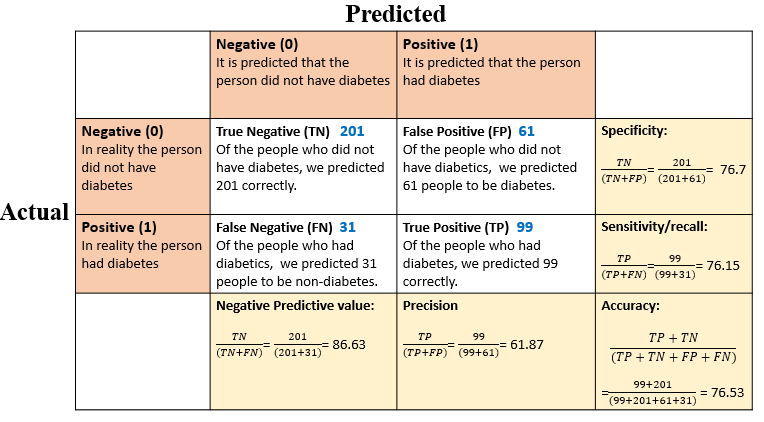

* **Negative Predictive value:** if our model predicts someone was not diabetic (sum of the first column, n=232), we would be correct 201/(201+31), or about 86.63% of the time.  That is a marginal improvement over 67%. Note that is also means our model gives a false negative 13.37% of the time. This is very bad because it means we have told someone with diabetes that they do not have the disease.
* **Precision:** if our model predicts someone is diabetic (sum of the second column, n=160), we would be correct about 99/(99+61), or about 61.87% of the time. This is an improvement over the base of 33%. Note that is also means our model gives a false positive 38.13% of the time. This is  bad, because 38.13% of the time we are telling non-diabetics people that they have diabetes.  If we start them on insulin, etc., this would be very dangerous. 

Another way to look at the accuracy of our model is to consider how our model performs, if we already know the outcome (whether the person has diabetes):
* **Specificity:** Given that someone is not diabetic (sum of the first row, n=262), our model will be correct 201/(201+61)= 76.7% of the time.
* **Sensitivity/Recall:** And if someone is diabetic (sum of the second row, n=130), our model will be correct about 99/(31+99)= 76.15% of the time.


## Model Accuracy:

In [20]:
accuracy=clf.score(X,Y)
print("you decision tree is {:.2f}% accurate".format(accuracy*100))

you decision tree is 76.53% accurate


In [21]:
(201+99)/(201+99+31+61)

0.7653061224489796

## Classification Report

In [22]:
from sklearn.metrics import classification_report
X=['healthy','diabetic'] 
print(classification_report(Y, predictions, target_names=X))

              precision    recall  f1-score   support

     healthy       0.87      0.77      0.81       262
    diabetic       0.62      0.76      0.68       130

    accuracy                           0.77       392
   macro avg       0.74      0.76      0.75       392
weighted avg       0.78      0.77      0.77       392



* Precision: when we know the model's prediction, how accurate does it predict the true outcome?
  * Percent of positive predictions that are actually correct
  * Used a lot in medical screening and drug testing
  * Used to minimize chance of false positives (predict they have diabetes when they dont)
  
* Recall (or sensitivity): When we know the actual outcome, how often does the model predict it correctly?
  * Percent of actual positives that are correctly predicted
  * Used widely in fraud detection
  * Use to minimize chance of false negatives (predict they dont have diabetes when they do)

* F1 is a composite score of the test's precision and recall.

In [23]:
print(clf.predict_proba([[122,35]]))


[[0.86637931 0.13362069]]


In [24]:
print(clf.predict([[122, 35]]))

[0]
